In [29]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
driver = webdriver.Chrome(service = Service('../chromedriver_win32/chromedriver.exe'))

In [32]:
url = 'https://www.instagram.com/'
driver.get(url)

In [31]:
url = 'https://www.instagram.com/'
driver.get(url)
email = 'gi93008@naver.com' # 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input.2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = 'dhkthkthk11!' # 비번정보 수정필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

C:\Users\gi930\AppData\Local\Temp/ipykernel_12208/4028568653.py:4: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  input_id = driver.find_elements_by_css_selector('input.2hvTZ.pexuQ.zyHYP')[0]


InvalidSelectorException: Message: invalid selector: An invalid or illegal selector was specified
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x003AFDC3+2555331]
	Ordinal0 [0x003477F1+2127857]
	Ordinal0 [0x00242E08+1060360]
	Ordinal0 [0x00245524+1070372]
	Ordinal0 [0x002453EE+1070062]
	Ordinal0 [0x00245650+1070672]
	Ordinal0 [0x0026E212+1237522]
	Ordinal0 [0x0026E69B+1238683]
	Ordinal0 [0x0029928C+1413772]
	Ordinal0 [0x00287B54+1342292]
	Ordinal0 [0x002975FA+1406458]
	Ordinal0 [0x00287976+1341814]
	Ordinal0 [0x002636B6+1193654]
	Ordinal0 [0x00264546+1197382]
	GetHandleVerifier [0x00549622+1619522]
	GetHandleVerifier [0x005F882C+2336844]
	GetHandleVerifier [0x004423E1+541697]
	GetHandleVerifier [0x00441443+537699]
	Ordinal0 [0x0034D18E+2150798]
	Ordinal0 [0x00351518+2168088]
	Ordinal0 [0x00351660+2168416]
	Ordinal0 [0x0035B330+2208560]
	BaseThreadInitThunk [0x7724FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77BE7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77BE7A6E+238]


In [33]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    
    return url
def insta_select(word):
    url = 'https://www.instagram.com/' + word
    return url

In [34]:
word = '제주도맛집'
url = insta_searching(word)
driver.get(url)
time.sleep(5)

In [39]:
from selenium.webdriver.common.by import By

#first = driver.find_element_by_css_selector('div_9AhH0)
first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
first.click()

In [47]:
BeautifulSoup(driver.page_source,'html.parser').select('div.Nm9Fw > a > span')[0].text

'388'

In [196]:
from selenium.webdriver.common.by import By

def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(5)
select_first(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x003AFDC3+2555331]
	Ordinal0 [0x003477F1+2127857]
	Ordinal0 [0x00242E08+1060360]
	Ordinal0 [0x0026E49E+1238174]
	Ordinal0 [0x0026E69B+1238683]
	Ordinal0 [0x00299252+1413714]
	Ordinal0 [0x00287B54+1342292]
	Ordinal0 [0x002975FA+1406458]
	Ordinal0 [0x00287976+1341814]
	Ordinal0 [0x002636B6+1193654]
	Ordinal0 [0x00264546+1197382]
	GetHandleVerifier [0x00549622+1619522]
	GetHandleVerifier [0x005F882C+2336844]
	GetHandleVerifier [0x004423E1+541697]
	GetHandleVerifier [0x00441443+537699]
	Ordinal0 [0x0034D18E+2150798]
	Ordinal0 [0x00351518+2168088]
	Ordinal0 [0x00351660+2168416]
	Ordinal0 [0x0035B330+2208560]
	BaseThreadInitThunk [0x7724FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77BE7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77BE7A6E+238]


In [65]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [78]:
import unicodedata

content = soup.select('div.C4VMK > span')[0].text
content = unicodedata.normalize('NFC',content)

content

'..#동백식당#갈비살#한라산..일을 열심히 했으니 ㅎㅎ한잔 적셔줘야죠?😍😍집근처  고깃집ㅎㅎ아부지.어머니.친구랑 나푸짐하게 먹어봅시다ㅋ아부지 계셔서 사진을 못찍겠어🤣🤣🤣🤣🤣🤣🤣대충 한장만 찍고..아부지랑 짠...친구는 제주시로 가야하니.ㅋ술 못먹고ㅋㅋ오늘은 아부지랑 짠짠✌✌..#제주도 #제주도맛집#서귀포맛집 #한라봉#친구#홈파티#요리사#참이슬#korea#플레이팅#맛집#안주#수원#수원맛집#먹방#소주#요리#술스타그램#요리스타그램#재희포차#온더테이블#대구맛집#부산맛집#제주도맛집#요리하는남자#레시피테러리스트'

In [90]:
import re # 글자를 다루게 해주는 모듈 (태그를 따로 뽑아줌)

tags = re.findall(r'#[^\s#,\\]+' ,content) # \w+ w = word 연속해서 뽑아라 # []은 or을 뜻한다 ^ :not
#tags = re.findall(r'#\w+' ,content) # 전부다 뽑기
tags

['#동백식당',
 '#갈비살',
 '#한라산',
 '#제주도',
 '#제주도맛집',
 '#서귀포맛집',
 '#한라봉',
 '#친구',
 '#홈파티',
 '#요리사',
 '#참이슬',
 '#korea',
 '#플레이팅',
 '#맛집',
 '#안주',
 '#수원',
 '#수원맛집',
 '#먹방',
 '#소주',
 '#요리',
 '#술스타그램',
 '#요리스타그램',
 '#재희포차',
 '#온더테이블',
 '#대구맛집',
 '#부산맛집',
 '#제주도맛집',
 '#요리하는남자',
 '#레시피테러리스트']

In [80]:
print(r'\n')  # https://wikidocs.net/4308

\n


In [97]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

'2022-01-16'

In [103]:
like = soup.select('a.zV_Nj > span')[0].text
#like

'389'

In [112]:
place = soup.select('div.JF9hh > a.O4GlU')[0].text
place = unicodedata.normalize('NFC',place)
place

'Seogwipo'

In [116]:
def get_content(driver):
    soup = BeautifulSoup(driver.page_source,'html.parser')
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC',content)
    except:
        content = ''
    try:
        tags = re.findall(r'#[^\s#,\\]+' ,content)
    except:
        tags = ''
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    try:
        like = soup.select('a.zV_Nj > span')[0].text
    except:
        like = 0
    try:
        place = soup.select('div.JF9hh > a.O4GlU')[0].text
        place = unicodedata.normalize('NFC',place)
    except:
        place = ''
    data = [content,date,like,place,tags]
    return data

In [117]:
mylist = get_content(driver)
mylist

['..#동백식당#갈비살#한라산..일을 열심히 했으니 ㅎㅎ한잔 적셔줘야죠?😍😍집근처  고깃집ㅎㅎ아부지.어머니.친구랑 나푸짐하게 먹어봅시다ㅋ아부지 계셔서 사진을 못찍겠어🤣🤣🤣🤣🤣🤣🤣대충 한장만 찍고..아부지랑 짠...친구는 제주시로 가야하니.ㅋ술 못먹고ㅋㅋ오늘은 아부지랑 짠짠✌✌..#제주도 #제주도맛집#서귀포맛집 #한라봉#친구#홈파티#요리사#참이슬#korea#플레이팅#맛집#안주#수원#수원맛집#먹방#소주#요리#술스타그램#요리스타그램#재희포차#온더테이블#대구맛집#부산맛집#제주도맛집#요리하는남자#레시피테러리스트',
 '2022-01-16',
 '389',
 'Seogwipo',
 ['#동백식당',
  '#갈비살',
  '#한라산..일을',
  '#제주도',
  '#제주도맛집',
  '#서귀포맛집',
  '#한라봉',
  '#친구',
  '#홈파티',
  '#요리사',
  '#참이슬',
  '#korea',
  '#플레이팅',
  '#맛집',
  '#안주',
  '#수원',
  '#수원맛집',
  '#먹방',
  '#소주',
  '#요리',
  '#술스타그램',
  '#요리스타그램',
  '#재희포차',
  '#온더테이블',
  '#대구맛집',
  '#부산맛집',
  '#제주도맛집',
  '#요리하는남자',
  '#레시피테러리스트']]

In [147]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

move_next(driver)

In [186]:
def login(id,pw,driver):
    url = 'https://www.instagram.com/'
    driver.get(url)
    soup=BeautifulSoup(driver.page_source,'html.parser')
    input_id = driver.find_element(By.CSS_SELECTOR,'input._2hvTZ.pexuQ.zyHYP')
    input_id.clear()
    input_id.send_keys(id)
    input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
    input_pw.clear()
    input_pw.send_keys(pw)
    input_pw.submit()
    time.sleep(3)

C:\Users\gi930\AppData\Local\Temp/ipykernel_12208/1822368939.py:8: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]


In [210]:

#login('','',driver)
def insta_crawling(word,n):
    global driver
    url = insta_searching(word)
    driver.get(url)
    time.sleep(10)
    select_first(driver)
    time.sleep(10)
    
    result = []
    for i in range(n):
        try:
            result.append(get_content(driver))
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
    return result


In [211]:
result_1 = insta_crawling('제주도맛집',20)

In [208]:
result_df = pd.DataFrame(result_1,columns = ['content','date','like','place','tags'])

result_df.head()

result_df.to_excel('./jeju_stu.xlsx',index = False)

In [212]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']
for fname in f_list:
    fpath = './files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    
    

In [216]:
jeju_insta_df.shape

(12780, 5)

In [217]:
jeju_insta_df.drop_duplicates(subset = ['content'],inplace = True)
jeju_insta_df.shape

(8369, 5)

In [218]:
jeju_insta_df.to_excel('./jeju_total.xlsx',index = False)

In [226]:
raw_total = jeju_insta_df.copy()

In [228]:
raw_total.columns
raw_total['tags']

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
0                                                   []
0                                             ['#제주도']
Name: tags, dtype: object

In [236]:
raw_total['tags'][0]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
0                                                   []
0                                             ['#제주도']
Name: tags, dtype: object

In [238]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)
    

In [242]:
from collections import Counter

tag_counts = Counter(tags_total)
type(tag_counts)
#pd.Series(tags_total).value_counts()

collections.Counter

In [243]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [255]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔','#제주속눈썹',
'#제주일상','#여행','#선팔','#제주도민','#제주살이','#제주시','#서귀포','#jejuisland','#daily','','#셀카','#제주','#제주여행','#제주관광',
'#제주도여행']
tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_total_selected=Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('#서귀포흑돼지', 577),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#중문맛집', 404),
 ('#먹스타그램', 395),
 ('#서귀포반영구', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#서귀포남자눈썹문신', 395),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#제주메이크업', 358),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#성산맛집', 316),
 ('#제주해안도로', 311),
 ('#제주시맛집', 311),
 ('#제주공항', 306),
 ('#좋아요', 305),
 ('#제주속눈썹연장', 305),
 ('#서귀포맛집추천', 303)]

In [271]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import sys

rc('font',family = 'malgun gothic')

In [268]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50),columns = ['tags','counts'])
tag_count_df.head()

tag_count_df['tags'].replace('',None,inplace=True)
tag_count_df.dropna(subset=['tags'],inplace = True)
tag_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    50 non-null     object
 1   counts  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


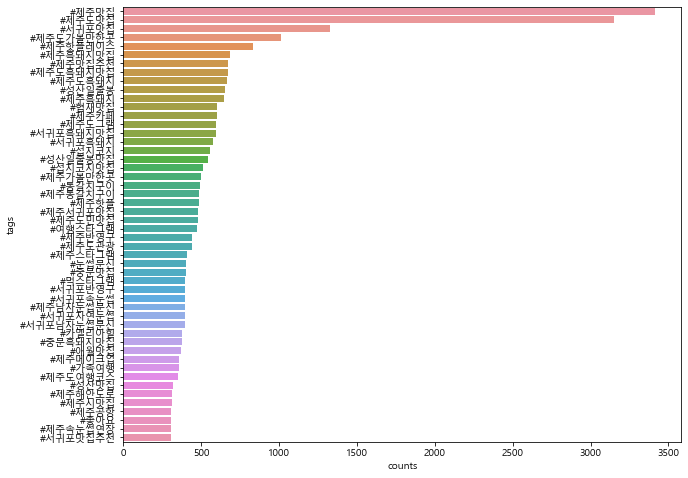

In [273]:
plt.figure(figsize =(10,8))
sns.barplot(x='counts',y = 'tags',
           data = tag_count_df)
plt.show()

In [275]:
! pip install wordcloud

  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161132 sha256=23797955e5d2016ec19f3912b7891a49b0532d9176a3cd3d33da66c4efa16924
  Stored in directory: c:\users\gi930\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [276]:
from wordcloud import WordCloud 

In [281]:
import pandas as pd

raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [285]:
location_counts = raw_total['place'].value_counts()

location_counts_df = pd.DataFrame(location_counts)
location_counts_df

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59
...,...
제주마당,1
형제섬,1
동복해녀식당,1
종로 광장시장,1


In [293]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',